In [9]:
clc
clear

In [17]:
s = load('/rds/general/user/ip620/home/mri_fyp/phantom/sequence/resultImage_s_te.mat');
s = s.resultImage_s;
l = load('/rds/general/user/ip620/home/mri_fyp/phantom/sequence/resultImage_l_te.mat');
l = l.resultImage_l;


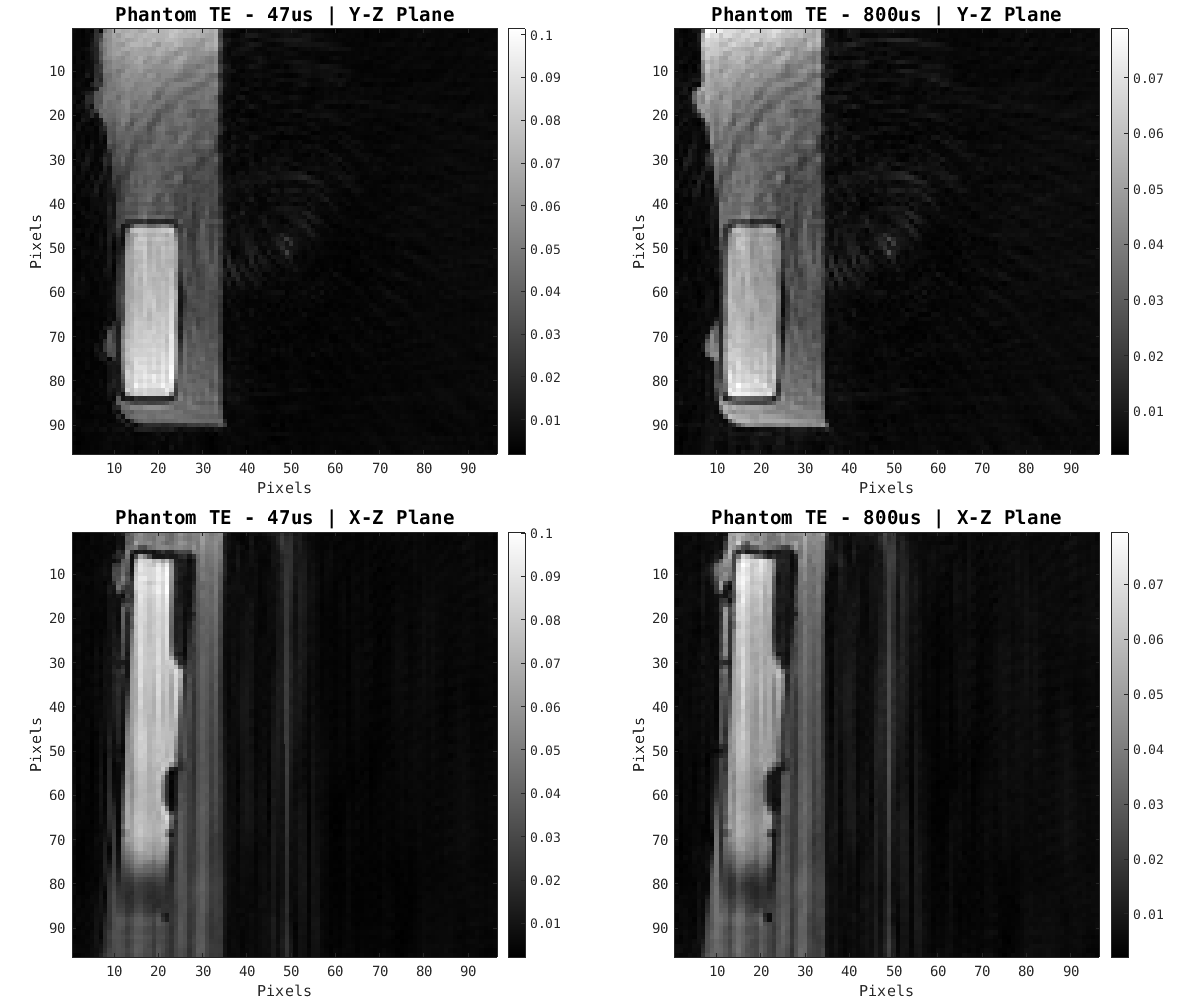

Figure saved as: /rds/general/user/ip620/home/mri_fyp/phantom/sequence/phantom_two_axes_figure.jpg


In [32]:
images_no_noise = {s, l};  % Your image volumes
image_names = {'Phantom TE - 47us', 'Phantom TE - 800us'};  % Names of the variables

% Variable to control which slice to display
sliceNumber = 48;  % Example: middle slice is 48 in a 96x96x96 volume (can be modified)

% Axes you want to show (e.g., x and z)
axisChoices = [1, 2];  % Show slices along x-axis and z-axis

% Create tiled layout for 2 rows (axes) and 2 columns (s/l images)
fig = figure('Name', 'Image Slices (Two Axes)', 'NumberTitle', 'off', 'Position', [100, 100, 1200, 1000]);
tiledlayout(2, 2, 'Padding', 'tight', 'TileSpacing', 'compact');

% Loop through axes (rows)
for axisIdx = 1:length(axisChoices)
    axisChoice = axisChoices(axisIdx);
    
    % Loop through both images (columns)
    for imgIdx = 1:length(images_no_noise)
        img = images_no_noise{imgIdx};

        % Get slice based on axis
        switch axisChoice
            case 1  % x-axis
                slice = squeeze(img(sliceNumber, :, :));
                axis_label = 'Y-Z Plane';
            case 2  % y-axis
                slice = squeeze(img(:, sliceNumber, :));
                axis_label = 'X-Z Plane';
            case 3  % z-axis
                slice = squeeze(img(:, :, sliceNumber));
                axis_label = 'X-Y Plane';
            otherwise
                error('Invalid axis choice');
        end

        % Select next tile
        nexttile((axisIdx - 1) * 2 + imgIdx);  % Maps (1,1)->1, (1,2)->2, (2,1)->3, (2,2)->4
        imagesc(abs(slice));
        axis image on;
        colormap('gray');
        colorbar;
        xlabel('Pixels');
        ylabel('Pixels');

        % Title with axis and TE
        title(sprintf('%s | %s', image_names{imgIdx}, axis_label), 'FontSize', 14);
    end
end

% Save high-res figure
save_path = fullfile('/rds/general/user/ip620/home/mri_fyp/phantom/sequence', 'phantom_two_axes_figure.jpg');
exportgraphics(gcf, save_path, 'Resolution', 300);

disp(['Figure saved as: ' save_path]);


Invalid text character. Check for unsupported symbol, invisible character, or pasting of non-ASCII characters.